# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

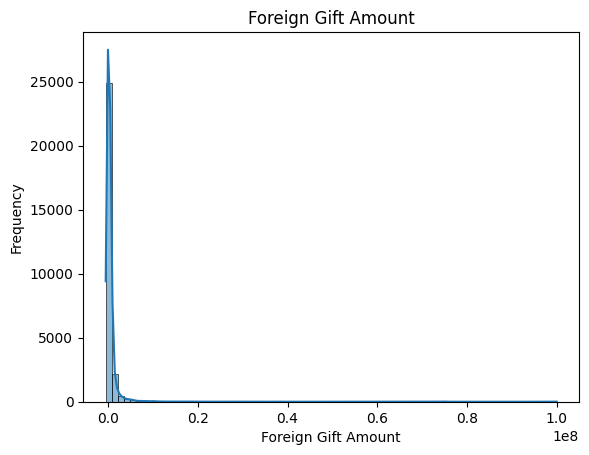

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Q1
foreign_gifts_data = pd.read_csv("./data/ForeignGifts_edu.csv")

#Q2
sns.histplot(foreign_gifts_data['Foreign Gift Amount'], bins=75, kde=True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Foreign Gift Amount')
plt.show()

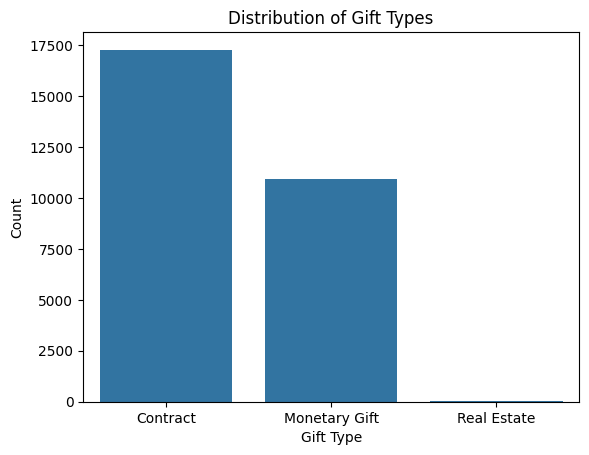

In [55]:
#Q3
gift_type_counts = foreign_gifts_data['Gift Type'].value_counts()

sns.barplot(x=gift_type_counts.index, y=gift_type_counts.values)
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.title('Distribution of Gift Types')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


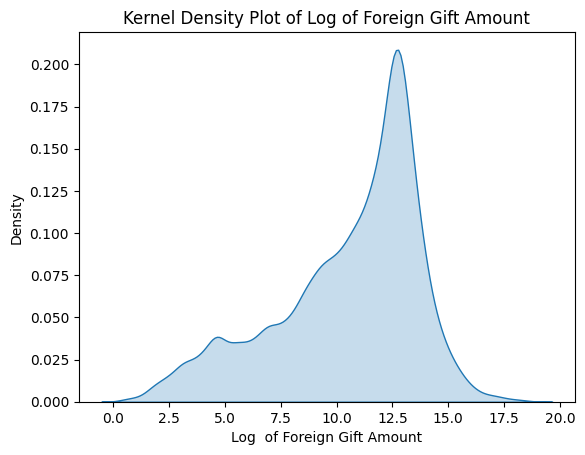

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


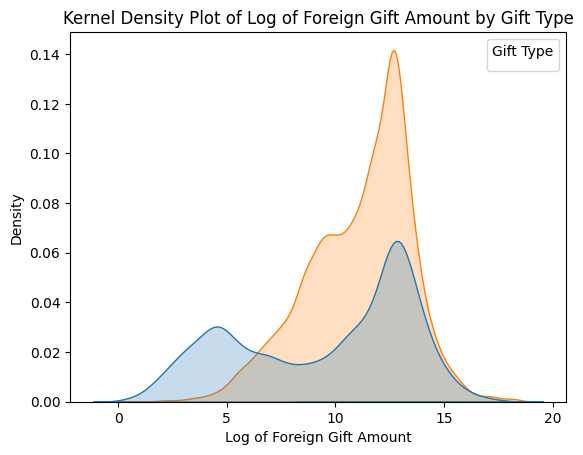

In [68]:
#Q4
foreign_gifts_data['Log Foreign Gift Amount'] = np.log1p(foreign_gifts_data['Foreign Gift Amount'])

sns.kdeplot(foreign_gifts_data['Log Foreign Gift Amount'], fill=True)
plt.xlabel('Log  of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')
plt.show()

sns.kdeplot(data=foreign_gifts_data, x='Log Foreign Gift Amount', hue='Gift Type', fill=True)
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')
plt.legend(title='Gift Type')
plt.show()

In [38]:
# Q5
top_countries_count = foreign_gifts_data.groupby('Country of Giftor').count()['Foreign Gift Amount'].nlargest(15)
print("Top 15 Countries by Number of Gifts:\n", top_countries_count)
print()

top_countries_amount = foreign_gifts_data.groupby('Country of Giftor').sum()['Foreign Gift Amount'].nlargest(15)
print("Top 15 Countries by Total Amount Given:\n", top_countries_amount)

Top 15 Countries by Number of Gifts:
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

Top 15 Countries by Total Amount Given:
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                4011

Top 15 Institutions by Total Amount Received:
 Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: in

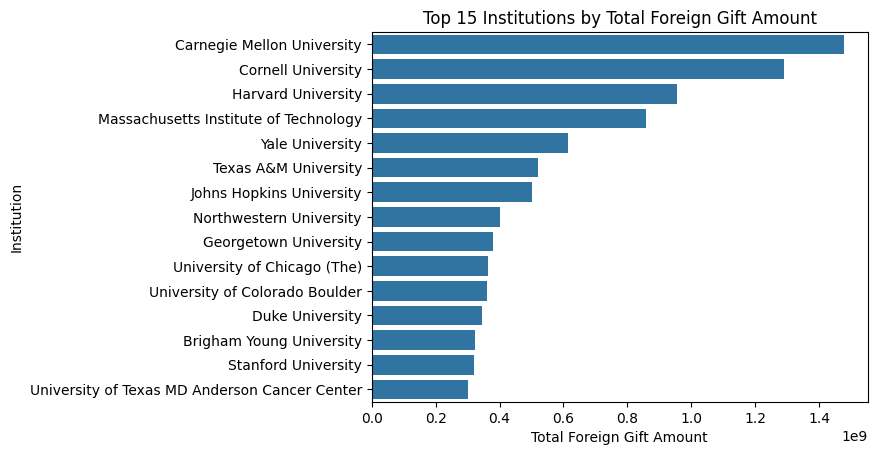

Top 15 Giftors by Total Amount Given:
 Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [72]:
#Q6
top_institutions = foreign_gifts_data.groupby('Institution Name').sum()['Foreign Gift Amount'].nlargest(15)
print("Top 15 Institutions by Total Amount Received:\n", top_institutions)

sns.barplot(y=top_institutions.index, x=top_institutions.values)
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Institution')
plt.title('Top 15 Institutions by Total Foreign Gift Amount')
plt.show()

# Q7
top_giftors = foreign_gifts_data.groupby('Giftor Name').sum()['Foreign Gift Amount'].nlargest(15)
print("Top 15 Giftors by Total Amount Given:\n", top_giftors)

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cleaning dataset
oil_rigs_data = pd.read_csv("./data/drilling_rigs.csv").replace("Not Available", pd.NA)
#Q2
oil_rigs_data['time'] = pd.to_datetime(oil_rigs_data['Month'], format='%Y %B', errors='coerce')
oil_rigs_data.rename(columns={
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)": "Onshore Rigs",
    "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)": "Offshore Rigs",
    "Active Well Service Rig Count (Number of Rigs)": "Active Rigs"
}, inplace=True)
oil_rigs_data[['Onshore Rigs', 'Offshore Rigs', 'Active Rigs']] = oil_rigs_data[['Onshore Rigs', 'Offshore Rigs', 'Active Rigs']].apply(pd.to_numeric, errors='coerce')
oil_rigs_data.dropna(subset=['time', 'Active Rigs'], inplace=True)

# Q1
print(f"Number of observations: {oil_rigs_data.shape[0]}")
print(f"Number of variables: {oil_rigs_data.shape[1]}")

Number of observations: 591
Number of variables: 11


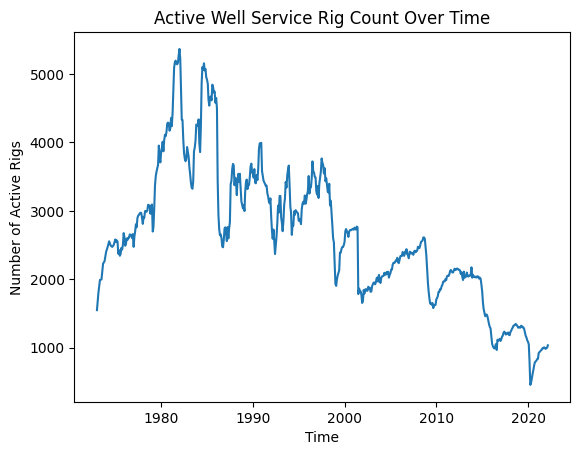

In [62]:
# Q3
sns.lineplot(x='time', y='Active Rigs', data=oil_rigs_data)
plt.xlabel('Time')
plt.ylabel('Number of Active Rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.show()

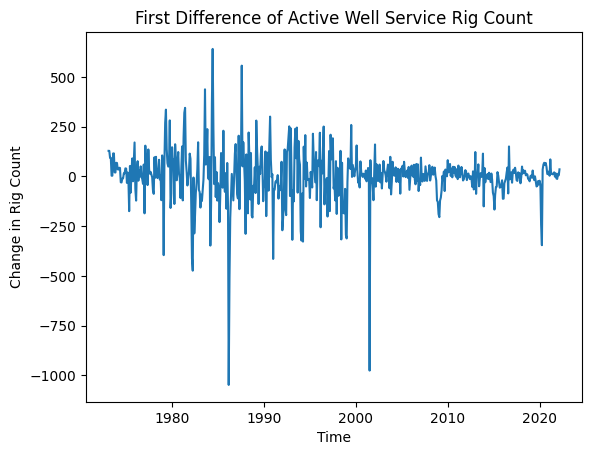

In [63]:
# Q4
oil_rigs_data['Rig Count Change'] = oil_rigs_data['Active Rigs'].diff()
sns.lineplot(x='time', y='Rig Count Change', data=oil_rigs_data)
plt.xlabel('Time')
plt.ylabel('Change in Rig Count')
plt.title('First Difference of Active Well Service Rig Count')
plt.show()

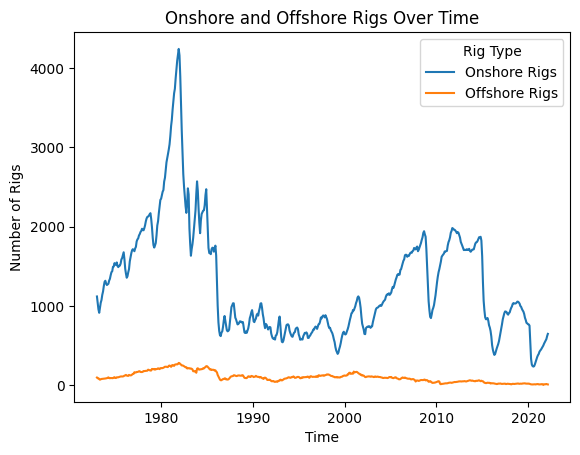

In [64]:
# Q5
melted_Oil_data = oil_rigs_data.melt(id_vars=['time'], value_vars=['Onshore Rigs', 'Offshore Rigs'], var_name='Rig Type', value_name='Rig Count').dropna()
sns.lineplot(data=melted_Oil_data, x='time', y='Rig Count', hue='Rig Type')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore and Offshore Rigs Over Time')
plt.legend(title='Rig Type')
plt.show()